This jupyter notebook contains a few examples to run the package. It contains also explanations on the different functions included.

First we need to include some packages

In [1]:
from math import *
import matplotlib.pyplot as pl
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize
from include import *
from utils import *

RELICE DENSITY CALCULATION

In order to calculate the relic density it is possible to use the function func_interpolate_Omega, which uses the code DRAKE near the Higggs resonance and MICROMEGAs elsewhere.
The row below calculates the relic density calculated as Omega h^2 for the QCDA model.

In [3]:
mS = 50 #GeV
lambda_hs = 0.1
func_interpolate_Omega(mS,lambda_hs,'QCDA')

0.12801745167589393

The row below calculates the relic density using MICROMEGAs.

In [5]:
mS = 50 #GeV
lambda_hs = 0.1
func_interpolate_Omega_MicrOMEGAs(mS,lambda_hs)

0.12855141158870298

As expected the results obtained with the functions func_interpolate_Omega and func_interpolate_Omega_MicrOMEGAs are similar for the mass tested above.
However, if we test masses close to the Higgs resonance the differences emerge:

In [8]:
mS = 60 #GeV
lambda_hs = 0.001
print(func_interpolate_Omega(mS,lambda_hs,'QCDA'))
print(func_interpolate_Omega_MicrOMEGAs(mS,lambda_hs))

0.06396689881423608
0.04752675754272283


The calculation of the relic density close to the resonance with DRAKE has been done for lambda_hs values between one and two orders of magnitude below and above the value that gives the correct relic abundance.
If one tries to calculate the relic density with the DRAKE results beyond this region a warning will be printed.

In [11]:
mS = 60 #GeV
lambda_hs = 0.1
print(func_interpolate_Omega(mS,lambda_hs,'QCDA'))

Warning, extrapolating.....
The relic density with DRAKE has been calculated for lambda_HS between  7.32e-05 0.01464
46.92619215842866


Note that the precomputed results with DRAKE have been done to cover the region which gives the right relic abundance so investigating region beyond the tested one is not recommended.

It is also possible to find the lambda_hs value which provides a give relic density. In order to do that you can use the function func_interpolate_lambda

In [13]:
mS = 60 #GeV
Omegah2 = 0.1
func_interpolate_lambda(mS,Omegah2,'QCDB')

array(0.00133397)

Note that for dark matter masses below 70 GeV and lambda_hs values larger than 1 the relic density have a turning point.
See plot below:

In [24]:
mass = 45
lambda_vec = np.logspace(-4.,2.,50)
omegah2_vec = np.zeros(len(lambda_vec))
for t in range(len(lambda_vec)):
    omegah2_vec[t] = func_interpolate_Omega_MicrOMEGAs(mass,lambda_vec[t])

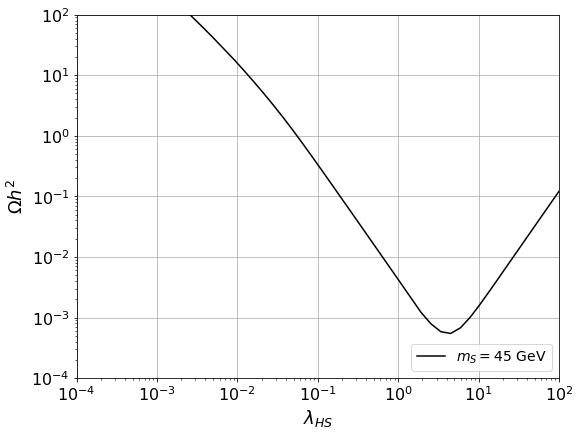

In [25]:
fig = pl.figure(figsize=(8,6))
#Relic
pl.plot(lambda_vec,omegah2_vec,lw=1.5,ls='-',color='black',label='$m_S=45$ GeV')
pl.ylabel(r'$\Omega h^2$', fontsize=18)
pl.xlabel(r'$\lambda_{HS}$', fontsize=18)
pl.axis([1e-4,100,1e-4,1e2])
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.grid(True)
pl.yscale('log')
pl.xscale('log') 
pl.legend(loc=4,prop={'size':14},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig("plots/relicdensity_turningpoint.pdf")

This implies that for mS<70 GeV there could be two possible for the lambda_HS which gives a value of the relic density.
The code prints a warning if this is the case. Se example below.

In [40]:
mS = 30 #GeV
Omegah2 = 0.001
func_interpolate_lambda(mS,Omegah2,'QCDB')

Warning, extrapolating.
For this mass pick a range of lambda between  0.001075 984200.0


0

In [37]:
mS = 70 #GeV
lambda_hs = 0.80952387
print(func_interpolate_Omega(mS,lambda_hs,'QCDA'))

0.0009975472734606318


The block below will generate a plot with the values of mass and lambda_hs which provide 100% or 30% of the relic density and the calculation with the QCDA and QCDB models and with MICROMEGAs. 

Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the problem f(lambda)=Omega h^2 could have two solutions for lambda
Warning the 

FileNotFoundError: [Errno 2] No such file or directory: '../plots/relicdensity_test.pdf'

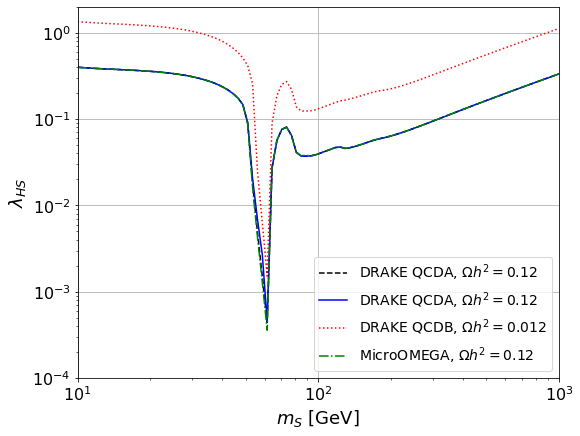

In [15]:
mass_vec = np.logspace(1.,3.,100)
lambda_QCDA_100_vec = np.zeros(len(mass_vec))
lambda_QCDB_100_vec = np.zeros(len(mass_vec))
lambda_QCDB_30_vec = np.zeros(len(mass_vec))
lambda_Micro_100_vec = np.zeros(len(mass_vec))
for t in range(len(mass_vec)):
    lambda_QCDA_100_vec[t] = func_interpolate_lambda(mass_vec[t],Omegah2,'QCDA')
    lambda_QCDB_100_vec[t] = func_interpolate_lambda(mass_vec[t],Omegah2,'QCDB')
    lambda_QCDB_30_vec[t] = func_interpolate_lambda(mass_vec[t],0.1*Omegah2,'QCDB')
    lambda_Micro_100_vec[t] = func_interpolate_lambda_MicrOMEGAs(mass_vec[t],Omegah2,'QCDB')

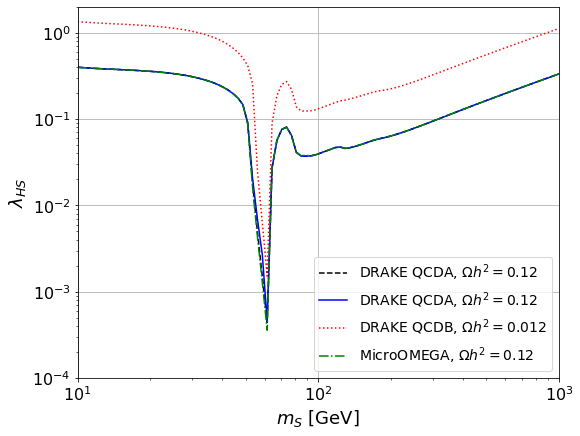

In [16]:
fig = pl.figure(figsize=(8,6))
#Relic
pl.plot(mass_vec,lambda_QCDA_100_vec,lw=1.5,ls='--',color='black',label='DRAKE QCDA, $\Omega h^2=0.12$')
pl.plot(mass_vec,lambda_QCDB_100_vec,lw=1.5,ls='-',color='blue',label='DRAKE QCDA, $\Omega h^2=0.12$')
pl.plot(mass_vec,lambda_QCDB_30_vec,lw=1.5,ls=':',color='red',label='DRAKE QCDB, $\Omega h^2=0.012$')
pl.plot(mass_vec,lambda_Micro_100_vec,lw=1.5,ls='-.',color='green', label=r'MicroOMEGA, $\Omega h^2=0.12$')
pl.ylabel(r'$\lambda_{HS}$', fontsize=18)
pl.xlabel(r'$m_{S}$ [GeV]', fontsize=18)
pl.axis([10.,1000,1e-4,2e0])
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.grid(True)
pl.yscale('log')
pl.xscale('log') 
pl.legend(loc=4,prop={'size':14},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig("plots/relicdensity_test.pdf")

The parameters mS and lambda_HS which provide the right relic abundance are reported in the file DATA/Omega_MicroOMEGAs_DRAKE_QCDB_QCDA.txt

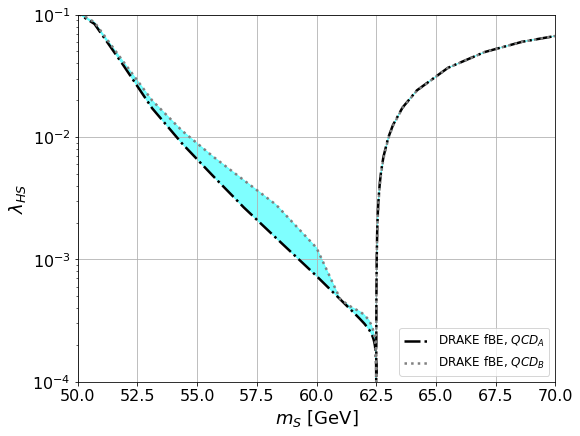

In [48]:
table = np.loadtxt('DATA/Omega_MicroOMEGAs_DRAKE_QCDB_QCDA.txt')
mass_RD = table[:,0]
lambda_RD_FBQCDA = table[:,1]
lambda_RD_FBQCDB = table[:,2]
fig = pl.figure(figsize=(8,6))
#Relic
pl.fill_between(mass_RD,lambda_RD_FBQCDA,lambda_RD_FBQCDB,color='cyan',alpha=0.5)
#pl.plot(mass_RD_NB,lambda_RD_NB,lw=1.5,ls=':',color='red', label=r'DRAKE nBE')
#pl.plot(mass_RD_CBQCDA,lambda_RD_CBQCDA,lw=1.5,ls='-',color='cyan', label=r'DRAKE cBE, $QCD_A$')
#pl.plot(mass_RD_CBQCDA,lambda_RD_CBQCDB,lw=1.5,ls='--',color='blue', label=r'DRAKE cBE, $QCD_B$')
pl.plot(mass_RD,lambda_RD_FBQCDA,lw=2.5,ls='-.',color='black', label=r'DRAKE fBE, $QCD_A$')
pl.plot(mass_RD,lambda_RD_FBQCDB,lw=2.5,ls=':',color='grey', label=r'DRAKE fBE, $QCD_B$')
#plt.colorbar()
pl.ylabel(r'$\lambda_{HS}$', fontsize=18)
pl.xlabel(r'$m_{S}$ [GeV]', fontsize=18)
pl.axis([50.,70,1e-4,1e-1])
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.grid(True)
pl.yscale('log')
pl.xscale('linear') 
pl.legend(loc=4,prop={'size':12},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig("plots/RD_paper_superzoom_paper.pdf")

###################

ANNIHILATION CROSS SECTION CALCULATION

In order to calculate the annihilation cross section you can use the function: func_sigmav_channels.
The example below calculates the annihilation cross section for the channel bb.

In [43]:
mS = 70 #GeV
lambda_hs = 0.01
func_sigmav_channels(mS,lambda_hs,'bb')

1.346728994901666e-28

These are the possible choices for the channels: cc','bb','tt','tautau','gg','ww','zz','hh','aa','za'.
    In order to take into account all the channels do:

In [57]:
mS = 200 #GeV
lambda_hs = 0.01
func_sigmav_channels(mS,lambda_hs,'tot')

4.680000000006868e-28

The code below instead calculates the total cross section adding all the possible annihilation channels.

In [56]:
mS = 200 #GeV
lambda_hs = 0.01
sigmav_tot = 0
channels_vec = np.array(['cc','bb','tt','tautau','gg','ww','zz','hh','aa','za'])
for t in range(len(channels_vec)):
    sigmav_tot += func_sigmav_channels(mS,lambda_hs,channels_vec[t])
print(sigmav_tot)

4.668283600003697e-28


The example below calculates the relative contribution of the different channels to the total cross section.

In [41]:
Br_cc = np.zeros(len(massz_vec))
Br_bb = np.zeros(len(massz_vec))
Br_tt = np.zeros(len(massz_vec))
Br_tautau = np.zeros(len(massz_vec))
Br_gg = np.zeros(len(massz_vec))
Br_ww = np.zeros(len(massz_vec))
Br_zz = np.zeros(len(massz_vec))
Br_hh = np.zeros(len(massz_vec))
Br_aa = np.zeros(len(massz_vec))
Br_za = np.zeros(len(massz_vec))
for t in range(len(massz_vec)):
    Br_cc[t] = func_sigmav_channels(massz_vec[t],0.001,'cc')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_bb[t] = func_sigmav_channels(massz_vec[t],0.001,'bb')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_tt[t] = func_sigmav_channels(massz_vec[t],0.001,'tt')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_tautau[t] = func_sigmav_channels(massz_vec[t],0.001,'tautau')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_gg[t] = func_sigmav_channels(massz_vec[t],0.001,'gg')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_ww[t] = func_sigmav_channels(massz_vec[t],0.001,'ww')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_zz[t] = func_sigmav_channels(massz_vec[t],0.001,'zz')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_hh[t] = func_sigmav_channels(massz_vec[t],0.001,'hh')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_aa[t] = func_sigmav_channels(massz_vec[t],0.001,'aa')/func_sigmav_channels(massz_vec[t],0.001,'tot')
    Br_za[t] = func_sigmav_channels(massz_vec[t],0.001,'za')/func_sigmav_channels(massz_vec[t],0.001,'tot')

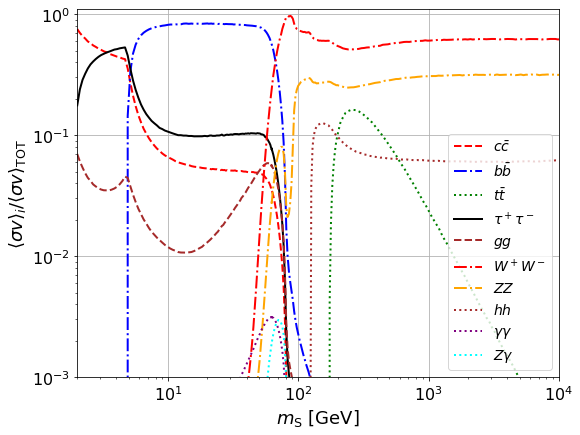

In [42]:
fig = pl.figure(figsize=(8,6))
pl.plot(massz_vec,Br_cc, color='red', ls='--', lw=2.0, label=r'$c\bar{c}$' )
pl.plot(massz_vec,Br_bb, color='blue', ls='-.', lw=2.0, label=r'$b\bar{b}$' )
pl.plot(massz_vec,Br_tt, color='green', ls=':', lw=2.0, label=r'$t\bar{t}$' )
pl.plot(massz_vec,Br_tautau, color='black', ls='-', lw=2.0, label=r'$\tau^+\tau^-$' )
pl.plot(massz_vec,Br_gg, color='brown', ls='--', lw=2.0, label=r'$gg$' )
pl.plot(massz_vec,Br_ww, color='red', ls='-.', lw=2.0, label=r'$W^+W^-$' )
pl.plot(massz_vec,Br_zz, color='orange', ls='-.', lw=2.0, label=r'$ZZ$' )
pl.plot(massz_vec,Br_hh, color='brown', ls=':', lw=2.0, label=r'$hh$' )
pl.plot(massz_vec,Br_aa, color='purple', ls=':', lw=2.0, label=r'$\gamma\gamma$' )
pl.plot(massz_vec,Br_za, color='cyan', ls=':', lw=2.0, label=r'$Z\gamma$' )
pl.ylabel(r'$\langle \sigma v \rangle_i/\langle \sigma v \rangle_{\rm{TOT}}$', fontsize=18)
pl.xlabel(r'$m_{\rm{S}}$ [GeV]', fontsize=18)
pl.axis([2,1e4,1e-3,1.1])
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.grid(True)
pl.yscale('log')
pl.xscale('log') 
pl.legend(loc=4,prop={'size':14},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig("plots/crosssection.pdf")

########################

SOURCE SPECTRA CALCULATION

You can use the function func_DMspectra_inttable to calculate the source spectrum.
The example below calculates the spectrum for gamma rays with smoothig.

In [5]:
mS = 200 #GeV
lambda_hs = 0.01
log10x,dNdlog10x = func_DMspectra_inttable(mS,lambda_hs,'gammas','Yes')

In [6]:
print(log10x,dNdlog10x)

[-8.955 -8.865 -8.775 -8.685 -8.595 -8.505 -8.415 -8.325 -8.235 -8.145
 -8.055 -7.965 -7.875 -7.785 -7.695 -7.605 -7.515 -7.425 -7.335 -7.245
 -7.155 -7.065 -6.975 -6.885 -6.795 -6.705 -6.615 -6.525 -6.435 -6.345
 -6.255 -6.165 -6.075 -5.985 -5.895 -5.805 -5.715 -5.625 -5.535 -5.445
 -5.355 -5.265 -5.175 -5.085 -4.995 -4.905 -4.815 -4.725 -4.635 -4.545
 -4.455 -4.365 -4.275 -4.185 -4.095 -4.005 -3.915 -3.825 -3.735 -3.645
 -3.555 -3.465 -3.375 -3.285 -3.195 -3.105 -3.015 -2.925 -2.835 -2.745
 -2.655 -2.565 -2.475 -2.385 -2.295 -2.205 -2.115 -2.025 -1.935 -1.845
 -1.755 -1.665 -1.575 -1.485 -1.395 -1.305 -1.215 -1.125 -1.035 -0.945
 -0.855 -0.765 -0.675 -0.585 -0.495 -0.405 -0.315 -0.225 -0.135 -0.045] [2.499485e-02 2.486417e-02 2.486236e-02 2.511304e-02 2.525963e-02
 2.523032e-02 2.537887e-02 2.550804e-02 2.557923e-02 2.586439e-02
 2.609542e-02 2.611656e-02 2.619649e-02 2.661558e-02 2.714063e-02
 2.743451e-02 2.776405e-02 2.814987e-02 2.855244e-02 2.916711e-02
 2.996515e-02 3.048045e-0

The examples below instead show the source spectra for gamma rays, positrons, antiprotons and neutrinos.

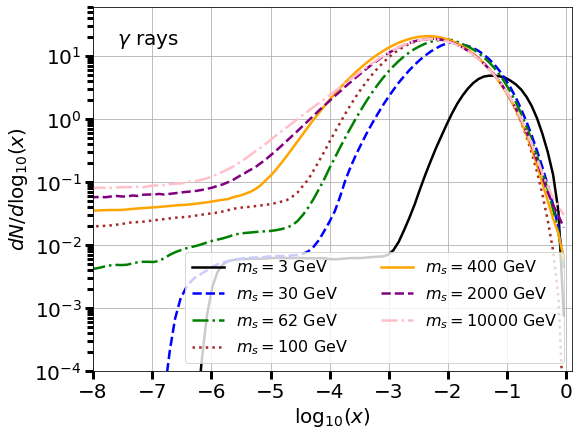

In [61]:
mass_vec = np.array([3.,30.0,62.,100,400.,2000,10000])
colors_vec = np.array(['black','blue','green','brown','orange','purple','pink'])
ls_vec = np.array(['-','--','-.',':','-','--','-.',':','-'])

fig = pl.figure(figsize=(8,6))

for t in range(len(mass_vec)):
    x_vec,dNdlogx = func_DMspectra_inttable(mass_vec[t],0.1,'gammas','Yes')
    pl.plot(x_vec,dNdlogx,lw=2.5,ls=ls_vec[t],color=colors_vec[t],label=r'$m_s=%d$ GeV'%mass_vec[t])

pl.xlabel(r'$\log_{10}(x)$', fontsize=20)
pl.ylabel(r'$dN/d\log_{10}(x)$', fontsize=20)
pl.text(-7.6,15,r'$\gamma$ rays', fontsize=20)
#pl.axis([vecangle_bin[0],vecangle_bin[len(vecangle_bin)-1],0.001,0.57], fontsize=18)
pl.axis([-8,0.1,1e-4,6e1])
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.tick_params('both', length=8, width=3, which='major')
pl.tick_params('both', length=6, width=3, which='minor')
pl.grid(True)
pl.yscale('log')
pl.xscale('linear')
pl.legend(loc=4,prop={'size':16},numpoints=1, scatterpoints=1, ncol=2)
fig.tight_layout(pad=0.5)
pl.savefig('plots/DMspectra_gamma.pdf')

In [ ]:
fig = pl.figure(figsize=(8,6))

for t in range(len(mass_vec)):
    x_vec,dNdlogx = func_DMspectra_inttable(mass_vec[t],0.1,'antiprotons','Yes')
    pl.plot(x_vec,dNdlogx,lw=2.5,ls=ls_vec[t],color=colors_vec[t],label=r'$m_s=%d$ GeV'%mass_vec[t])

pl.xlabel(r'$\log_{10}(x)$', fontsize=20)
pl.ylabel(r'$dN/d\log_{10}(x)$', fontsize=20)
#pl.axis([vecangle_bin[0],vecangle_bin[len(vecangle_bin)-1],0.001,0.57], fontsize=18)
pl.text(-1.9,3e-4,r'$\bar{p}$', fontsize=20)
pl.axis([-6,0.1,1e-4,5e0])
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.tick_params('both', length=8, width=3, which='major')
pl.tick_params('both', length=6, width=3, which='minor')
pl.grid(True)
pl.yscale('log')
pl.xscale('linear')
pl.legend(loc=2,prop={'size':16},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig('plots/DMspectra_antiprotons.pdf')

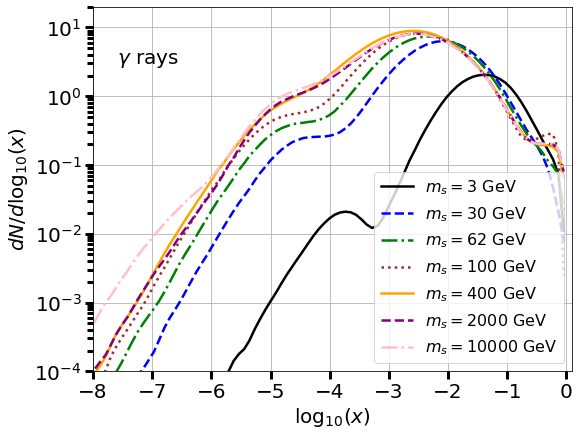

In [62]:
fig = pl.figure(figsize=(8,6))

for t in range(len(mass_vec)):
    x_vec,dNdlogx = func_DMspectra_inttable(mass_vec[t],0.1,'positrons','Yes')
    pl.plot(x_vec,dNdlogx,lw=2.5,ls=ls_vec[t],color=colors_vec[t],label=r'$m_s=%d$ GeV'%mass_vec[t])

pl.xlabel(r'$\log_{10}(x)$', fontsize=20)
pl.ylabel(r'$dN/d\log_{10}(x)$', fontsize=20)
pl.text(-7.6,3,r'$\gamma$ rays', fontsize=20)
#pl.axis([vecangle_bin[0],vecangle_bin[len(vecangle_bin)-1],0.001,0.57], fontsize=18)
pl.axis([-8,0.1,1e-4,2e1])
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.tick_params('both', length=8, width=3, which='major')
pl.tick_params('both', length=6, width=3, which='minor')
pl.grid(True)
pl.yscale('log')
pl.xscale('linear')
pl.legend(loc=4,prop={'size':16},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig('plots/DMspectra_positrons.pdf')

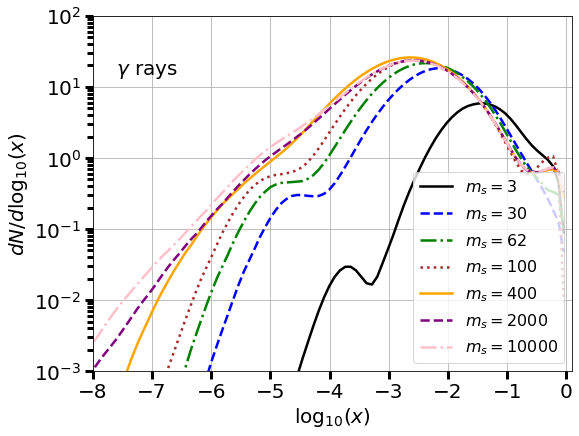

In [63]:
fig = pl.figure(figsize=(8,6))

for t in range(len(mass_vec)):
    x_vec,dNdlogx_ne = func_DMspectra_inttable(mass_vec[t],0.1,'neutrinos_e','Yes')
    x_vec,dNdlogx_nmu = func_DMspectra_inttable(mass_vec[t],0.1,'neutrinos_mu','Yes')
    x_vec,dNdlogx_ntau = func_DMspectra_inttable(mass_vec[t],0.1,'neutrinos_tau','Yes')
    pl.plot(x_vec,dNdlogx_ne+dNdlogx_nmu+dNdlogx_ntau,lw=2.5,ls=ls_vec[t],color=colors_vec[t],label=r'$m_s=%d$'%mass_vec[t])

pl.xlabel(r'$\log_{10}(x)$', fontsize=20)
pl.ylabel(r'$dN/d\log_{10}(x)$', fontsize=20)
pl.text(-7.6,15,r'$\gamma$ rays', fontsize=20)
#pl.axis([vecangle_bin[0],vecangle_bin[len(vecangle_bin)-1],0.001,0.57], fontsize=18)
pl.axis([-8,0.1,1e-3,1e2])
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.tick_params('both', length=8, width=3, which='major')
pl.tick_params('both', length=6, width=3, which='minor')
pl.grid(True)
pl.yscale('log')
pl.xscale('linear')
pl.legend(loc=4,prop={'size':16},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig('plots/DMspectra_neutrinos.pdf')

#############################

DIRECT DETECTION CALCULATION

The direct detection part is calculated using the function func_SI_noomega. This function performs the calculation of the spin independent cross section analytically assuming that fN=0.297. The example below calculates the spin independent cross section for a specific value of DM mass and coupling. 

In [7]:
mS = 70 #GeV
lambda_hs = 0.01
func_SI_noomega(mS,lambda_hs)

1.781425424359045e-46

Instead, in order to find the upper limits for lambda_hs you can use the function func_GetUL_DD_Mine_nomega.

The example below calculates the upper limits for lambda_hs for the LZ and future DARWIN experiments.

In [2]:
DMmassDD_vec = np.logspace(log10(2.),4.,100)
LambdaDD_LZ_HS_vec = np.zeros(len(DMmassDD_vec))
LambdaDD_Darwin_HS_vec = np.zeros(len(DMmassDD_vec))
for t in range(len(DMmassDD_vec)):
    LambdaDD_LZ_HS_vec[t] = func_GetUL_DD_nomega(DMmassDD_vec[t],'LZ')
    LambdaDD_Darwin_HS_vec[t] = func_GetUL_DD_nomega(DMmassDD_vec[t],'DARWIN')

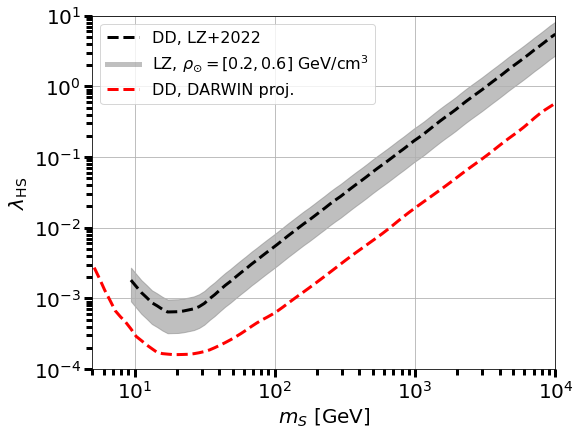

In [3]:
fig = pl.figure(figsize=(8,6))
pl.plot(DMmassDD_vec[18:],LambdaDD_LZ_HS_vec[18:],lw=3.0,ls='--',color='black',label=r'DD, LZ+2022')
pl.fill_between(DMmassDD_vec[18:],(0.3/0.2)*LambdaDD_LZ_HS_vec[18:],(0.3/0.6)*LambdaDD_LZ_HS_vec[18:],alpha=0.5,color='grey')
pl.plot(DMmassDD_vec[18:],1e-10*(0.3/0.2)*LambdaDD_LZ_HS_vec[18:],lw=5.0,alpha=0.5,color='grey',label=r'LZ, $\rho_{\odot}=[0.2,0.6]$ GeV/cm$^3$')
pl.plot(DMmassDD_vec[11:],LambdaDD_Darwin_HS_vec[11:],lw=3.0,ls='--',color='red',label=r'DD, DARWIN proj.')
pl.xlabel(r'$m_S$ [GeV]', fontsize=20)
pl.ylabel(r'$\lambda_{\rm{HS}}$', fontsize=20)
#pl.axis([vecangle_bin[0],vecangle_bin[len(vecangle_bin)-1],0.001,0.57], fontsize=18)
pl.axis([5,1e4,1e-4,1e1])
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.tick_params('both', length=8, width=3, which='major')
pl.tick_params('both', length=6, width=3, which='minor')
pl.grid(True)
pl.yscale('log')
pl.xscale('log')
pl.legend(loc=2,prop={'size':16},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig('plots/plot_ScalarHiggs_DD_noomega_paper.pdf')

The script below calculates the direct detection constraints including the rescaling due to the density of dark matter of the S particles.
First we calculate the csi term which is the relative ratio of S particle density over the total dark matter one

In [2]:
Omegah2_best = 0.120

#####Relic density
table = np.loadtxt('DATA/Omega_MICROMEGAs_zoom_paper.txt')

Lambda_vec = np.logspace(-5,1,500)
csi_vec = np.zeros(len(MassDD_vec)*len(Lambda_vec))

cont = 0
for t in range(len(MassDD_vec)):
    for u in range(len(Lambda_vec)):
        if table[cont,2]<0.:
            table[cont,2] = 1e6
        csi_vec[cont] = table[cont,2]/Omegah2_best
        cont = cont + 1

In [3]:
csi_vec

array([1.24166667e+06, 1.21250000e+06, 1.18416667e+06, ...,
       2.54083333e-05, 2.40916667e-05, 2.28333333e-05])

The we use the function func_GetUL_DD to get the upper limits including also the relic density of S

In [4]:
DMmassDD_vec = np.logspace(log10(5),4.,100)
LambdaDD_LZ_HS_vec = np.zeros(len(MassDD_vec))
LambdaDD_Darwin_HS_vec = np.zeros(len(MassDD_vec))
for t in range(len(MassDD_vec)):
    LambdaDD_LZ_HS_vec[t] = func_GetUL_DD_withomega(MassDD_vec[t],Lambda_vec,MassDD_vec,csi_vec,'LZ')
    LambdaDD_Darwin_HS_vec[t] = func_GetUL_DD_withomega(MassDD_vec[t],Lambda_vec,MassDD_vec,csi_vec,'Darwin')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 66
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 88
Optimization terminated successful

In [5]:
table_RD_FB = np.loadtxt('DATA/DRAKE_omega_fBE_QCDB_paper.txt')
mass_RD_FBQCDB = table_RD_FB[:,0]
lambda_RD_FBQCDB = table_RD_FB[:,1]

funcint_RD = interp1d(mass_RD_FBQCDB,lambda_RD_FBQCDB)
for t in range(len(MassDD_vec)):
    if funcint_RD(MassDD_vec[t])>LambdaDD_LZ_HS_vec[t]:
        LambdaDD_LZ_HS_vec[t]=funcint_RD(MassDD_vec[t])
    if funcint_RD(MassDD_vec[t])>LambdaDD_Darwin_HS_vec[t]:
        LambdaDD_Darwin_HS_vec[t]=funcint_RD(MassDD_vec[t])
    #print(Mass_vec[t],LambdaDD_LZ_HS_vec[t],LambdaDD_Darwin_HS_vec[t])

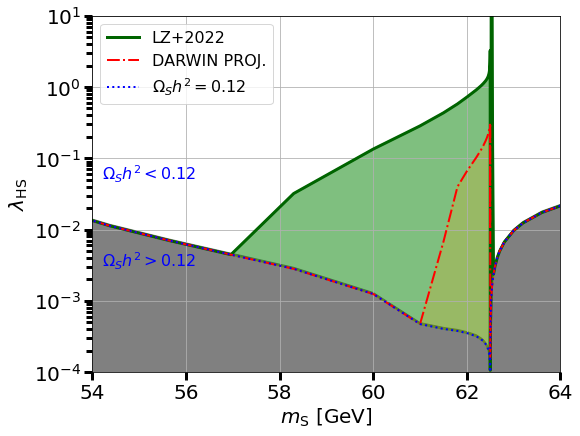

In [6]:
fig = pl.figure(figsize=(8,6))
pl.fill_between(mass_RD_FBQCDB,lambda_RD_FBQCDB*1e-6,lambda_RD_FBQCDB*1.05,color='grey')
pl.fill_between(MassDD_vec,funcint_RD(MassDD_vec),LambdaDD_LZ_HS_vec,lw=2.0,alpha=0.5,color='green')
pl.fill_between(MassDD_vec,funcint_RD(MassDD_vec),LambdaDD_Darwin_HS_vec,lw=2.0,alpha=0.2,color='orange')
pl.plot(MassDD_vec,LambdaDD_LZ_HS_vec,lw=3.0,ls='-',color='darkgreen',label=r'LZ+2022')
pl.plot(MassDD_vec,LambdaDD_Darwin_HS_vec,lw=2.0,ls='-.',color='red',label=r'DARWIN PROJ.')
#pl.plot(mass_RD[0:75],lambda_RD[0:75],lw=2.0,ls='--',color='blue', label=r'$\Omega_{S}h^2=0.12}$')
#pl.plot(mass_RD[155:len(mass_RD)-1],lambda_RD[155:len(mass_RD)-1],lw=2.0,ls=':',color='blue')
pl.plot(mass_RD_FBQCDB,lambda_RD_FBQCDB,lw=2.0,ls=':',color='blue', label=r'$\Omega_{S}h^2=0.12}$')
pl.text(54.2,0.05,r'$\Omega_{S}h^2<0.12}$',color='blue', fontsize=16)
pl.text(54.2,0.003,r'$\Omega_{S}h^2>0.12}$',color='blue', fontsize=16)
pl.xlabel(r'$m_{\rm{S}}$ [GeV]', fontsize=20)
pl.ylabel(r'$\lambda_{\rm{HS}}$', fontsize=20)
pl.axis([54,64,1e-4,1e1])
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.tick_params('both', length=8, width=3, which='major')
pl.tick_params('both', length=6, width=3, which='minor')
pl.grid(True)
pl.yscale('log')
pl.xscale('linear')
pl.legend(loc=2,prop={'size':16},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig('plots/UL_DD_withrelic_zoom_paper.pdf')

#########################

COLLIDER 

The constraints from collider are calculated using the upper limits on the contribution of invisible Higgs decay. 
The package calculates the branching ratio in invibile decay with the function func_Gamma_inv.

In [7]:
func_Gamma_inv(50,0.01)

0.0002889426160844741

The script below shows how to perform the upper limits using collider data.

In [10]:
Gamma_inv_measured = 0.170
Gamma_inv_future = 0.025
mh = 125
Gamma_H_SM = 3.8e-3 #GeV

DMmass_vec = np.linspace(10.,mh/2.,1000)
Lambda_current_vec = np.zeros(len(DMmass_vec))
Lambda_future_vec = np.zeros(len(DMmass_vec))
Br_value = Gamma_inv_measured
for t in range(len(DMmass_vec)):
    Lambda_current_vec[t] = func_minimize(DMmass_vec[t],Gamma_H_SM,Gamma_inv_measured)
    Lambda_future_vec[t] = func_minimize(DMmass_vec[t],Gamma_H_SM,Gamma_inv_future)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         F

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 21
         Function evaluations: 42
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 48
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 38
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 17
         Function evaluations: 50


In [11]:
table_newB = np.loadtxt('DATA/bounds_collider_SHP_current.dat')
table_newB_p = np.loadtxt('DATA/bounds_collider_SHP_projection.dat')

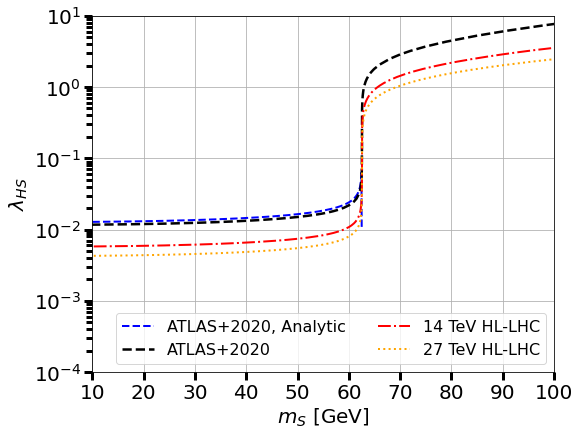

In [12]:
fig = pl.figure(figsize=(8,6))
pl.plot(DMmass_vec,Lambda_current_vec,lw=2.0,ls='--',color='blue',label=r'ATLAS+2020, Analytic')
pl.plot(table_newB[:,0],table_newB[:,1],lw=2.5,ls='--',color='black',label=r'ATLAS+2020')
pl.plot(table_newB_p[:,0],table_newB_p[:,4],lw=2.0,ls='-.',color='red',label=r'14 TeV HL-LHC')
pl.plot(table_newB_p[:,0],table_newB_p[:,5],lw=2.0,ls=':',color='orange',label=r'27 TeV HL-LHC')
pl.xlabel(r'$m_{S}$ [GeV]', fontsize=20)
pl.ylabel(r'$\lambda_{HS}$', fontsize=20)
#pl.axis([vecangle_bin[0],vecangle_bin[len(vecangle_bin)-1],0.001,0.57], fontsize=18)
pl.axis([10,100,1e-4,1e1])
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.tick_params('both', length=8, width=3, which='major')
pl.tick_params('both', length=6, width=3, which='minor')
pl.grid(True)
pl.yscale('log')
pl.xscale('linear')
pl.legend(loc=4,prop={'size':16},numpoints=1, scatterpoints=1, ncol=2)
fig.tight_layout(pad=0.5)
pl.savefig('plots/plot_ScalarHiggs_invisibleHiggs.pdf')